# Regression Checkpoint

The goal is to find the best model to predict a house’s price.

## Explore the dataset 

In [1]:
# First of all, we need to import the Python pandas library
import pandas as pd

In [2]:
# We read the dataset through the read_csv() function
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### General information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

This dataset has 21613 examples and 21 columns (20 features + the target variable : price). 5 of the columns are floats, 15 are integers and 1 object.

There are no missing values!

In [4]:
# Descriptive statistics about the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Visualization & Data Preprocessing

We start by studying the distribution of the most important features based on our understanding of the dataset and the problem.

In [5]:
# We need to import the Python Matplotlib and Seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Target distribution : Price distribution

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

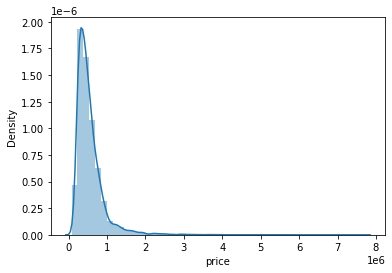

In [6]:
sns.distplot(data["price"])

It looks like a Normal Distribution, but on the right there is some data that distorts the distribution.

### Plot correlation map

In [7]:
def plot_correlation_map(df):
    corr = df.corr()
    s ,ax = plt.subplots(figsize = (14,12))
    cmap = sns.diverging_palette(250, 100, s=75, l=40, n=9, as_cmap = True)
    s = sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink":.9}, ax=ax, annot=True, annot_kws={'fontsize':12})

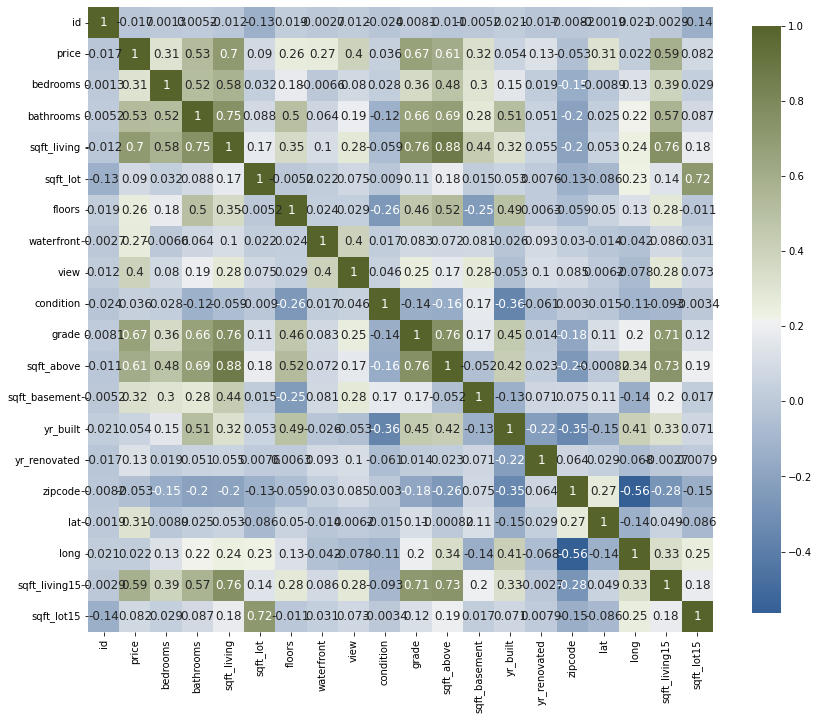

In [8]:
plot_correlation_map(data)

The plot_correlation_map function show the correlation between our dataset columns.

In [9]:
data.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

We can see that the price is more correlated to sqft_living, grade, sqft_above, sqft_living15 and bathrooms.

- Correlation between price and sqft_living is (0.7)
- Correlation between price and grade is (0.67)
- Correlation between price and sqft_above is (0.61)
- Correlation between price and sqft_living15 is (0.59)
- Correlation between price and bathrooms is (0.53)

we may observe that price has the highest correlation coefficient with living area (sqft_living) (0.7). We will use living area (sqft_living) as feature while creating linear regression model.

### Correlation between price and sqft_living

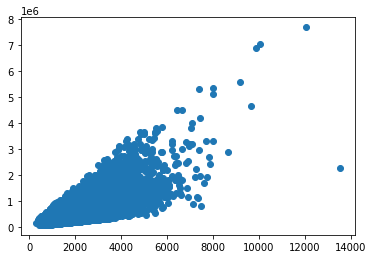

In [10]:
plt.scatter(data["sqft_living"], data["price"])

It seems that we have a linear relationship between price and sqft_living.

### Correlation between price and grade

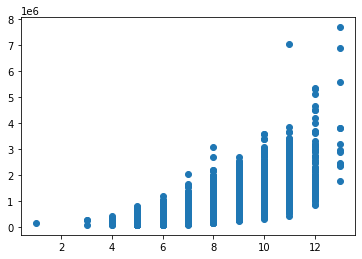

In [11]:
plt.scatter(data["grade"], data["price"])

It seems that we have a relationship between price and grade.

### Correlation between price and sqft_above

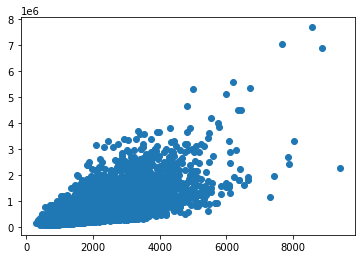

In [12]:
plt.scatter(data["sqft_above"], data["price"])

It seems that we have a linear relationship between price and sqft_above.

### Correlation between price and sqft_living15

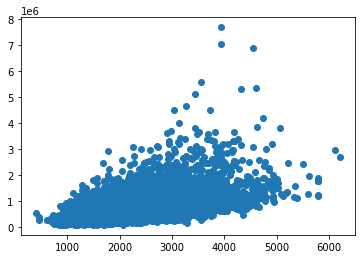

In [13]:
plt.scatter(data["sqft_living15"], data["price"])

##  Spliting your dataset into a training set and a testing set. 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Extract X and y from our data

X = data["sqft_living"].values.reshape(-1,1)
y = data["price"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

## Ploting the Linear Regression

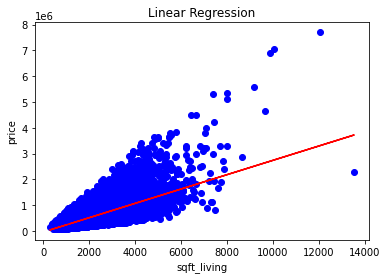

In [18]:
plt.scatter(X, y, color = "b")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(X, model.predict(X.reshape(-1,1)), color = "r")
plt.show()

## Measuring the performance of linear regression using the testing set

In [19]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [20]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 71031362556.74606
R squared 0.5094896634542325


## Multiple-linear Regression

In [21]:
selected_features = ["sqft_living","grade","sqft_above","sqft_living","bathrooms"]

X = data[selected_features].values
y = data["price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

### Comparing to the linear model

In [23]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 64620719556.42583
R squared 0.5537586531283327


the multiple regression model is more efficient than the linear regression model.

## Polynomial Regression

In [24]:
X = data["sqft_living"].values
y = data["price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [25]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 2)

In [26]:
model = LinearRegression()

X_train_fit = poly.fit_transform(X_train.reshape(-1,1))
model.fit(X_train_fit, y_train.reshape(-1,1))

X_test_ = poly.fit_transform(X_test.reshape(-1,1))
predicted = model.predict(X_test_)

### Comparing to the linear and multilinear regression

In [27]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 75106100976.07515
R squared 0.4813513701502806


the polynomial regression model is less efficient than the linear and multilinear regression models !